In [1]:
import os 
#data_location = input("Enter Path Location of data")
os.chdir("/home/mitchell/Documents/masters/masters/scripts/")
import galaxy_pairs
import cmb
import numpy as np
import scipy as sp
import astropy as ap
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
from mpdaf.obj import Image,WCS
import sptpol_software as sps
from astropy.io import fits
from astropy.cosmology import Planck15
from astropy import units as u
import scipy.spatial.distance as dist
print(Planck15)
cosmo= Planck15
cwd = os.getcwd()
print(cwd)
from sptpol_software.util.tools import stat
from sptpol_software.observation import *
import sptpol_software.observation as obs
import sptpol_software as sps
import sptpol_software.observation.sky
from sptpol_software.util import files

pywtl packages could not be imported.  This may break plotting code.
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
/home/mitchell/Documents/masters/masters/scripts


In [2]:
size_of_array = int(input("Enter the size of the array: "))
array_1= np.zeros(shape = (size_of_array,size_of_array))
array_2 = np.zeros(shape = (size_of_array,size_of_array))

Enter the size of the array:  70


In [3]:
source_loc_1 = np.array([np.random.randint(0,len(array_1)-10),np.random.randint(0,len(array_1)-10)])
source_loc_2 = np.array([np.random.randint(0,len(array_2)-10),np.random.randint(0,len(array_2)-10)])
print(source_loc_1)
# print(source_loc_2)

[40  5]


In [4]:
x1 = source_loc_1[0]
print("x1 = " + str(x1))
print("-x1 = " + str(len(array_1)-x1))
y1 = source_loc_1[1]
print("y1 = " + str(y1))
print("-y1 = " + str(len(array_1)-y1))

x2 = source_loc_2[0]
print("x2 = " + str(x2))
print("-x2 = " + str(len(array_1)-x2))

y2 = source_loc_2[1]
print("y2 = " + str(y2))
print("-y2 = " + str(len(array_1)-y2))

# source = makeGaussian(size_of_source,size_of_source)
# array[x1:x1+source.shape[0], y1:y1+source.shape[1]] = source
# array[-x1-source.shape[0]:-x1, -y1-source.shape[1]:-y1] = source


x1 = 40
-x1 = 30
y1 = 5
-y1 = 65
x2 = 43
-x2 = 27
y2 = 37
-y2 = 33


In [5]:
# plt.imshow(array)

In [6]:
# source_x1 = x1+(source.shape[0]/2)
# source_y1 = y1+(source.shape[1]/2)
# source_x2 = -x1-(source.shape[0]/2)
# source_y2 = -y1+(source.shape[1]/2)

angle_1 = np.degrees(np.arctan((float(len(array_1)-y1)-float(y1))/(float(len(array_1)-x1)-float(x1))))
angle_2 =  np.degrees(np.arctan((float(len(array_2)-y2)-float(y2))/(float(len(array_2)-x2)-float(x2))))

In [7]:
print(angle_1)
print(angle_2)

-80.53767779197439
14.036243467926479


In [8]:
array_1[source_loc_1[0]][source_loc_1[1]] = 1
array_1[-source_loc_1[0]][-source_loc_1[1]] = 1
gauss_array_1 = sp.ndimage.gaussian_filter(array_1,2) + np.random.normal(scale=0.01,size=np.shape(array_1))
array_2[source_loc_2[0]][source_loc_2[1]] = 1
array_2[-source_loc_2[0]][-source_loc_2[1]] = 1
gauss_array_2 = sp.ndimage.gaussian_filter(array_2,2) + np.random.normal(scale=0.01,size=np.shape(array_2))

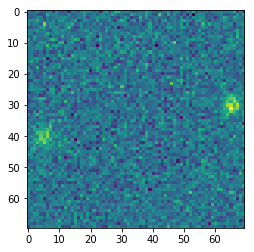

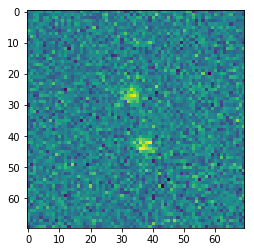

In [9]:
plt.imshow(gauss_array_1)
plt.show()
plt.imshow(gauss_array_2)
plt.show()

In [10]:
rot_array_1 =  sp.ndimage.rotate(gauss_array_1, 90-angle_1, reshape=True)
rot_array_2 =  sp.ndimage.rotate(gauss_array_2, 90-angle_2, reshape=True)

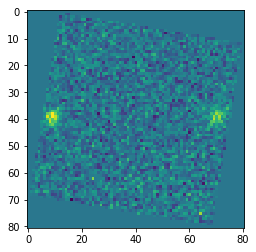

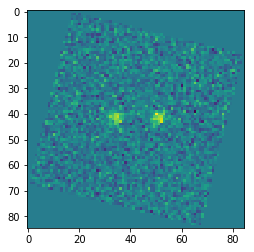

In [11]:
plt.imshow(rot_array_1)
plt.show()
plt.imshow(rot_array_2)
plt.show()

In [12]:
sep_1 = np.sqrt(((len(array_1)-x1)-x1)**2 + ((len(array_1)-y1) - y1)**2)
print(sep_1)
scale_fac_1 = 80.0/sep_1
sep_2 = np.sqrt(((len(array_2)-x2)-x2)**2 + ((len(array_2)-y2) - y2)**2)
print(sep_2)
scale_fac_2 = 80.0/sep_2


60.8276253029822
16.492422502470642


In [13]:
print(scale_fac_1)
print(scale_fac_2)

1.3151918984428583
4.85071250072666


/home/mitchell/Software/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


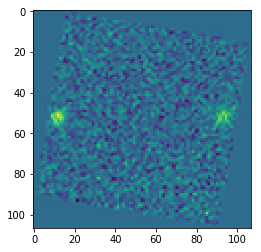

In [14]:
rescaled_array_1 = sp.ndimage.zoom(rot_array_1,scale_fac_1)
plt.imshow(rescaled_array_1)
plt.show()
# test = np.pad(rescaled_array_1,30,mode="constant")
# plt.imshow(test)
# plt.show()


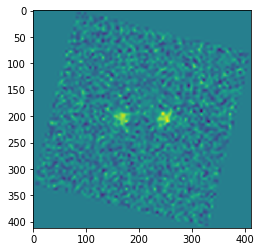

In [15]:
rescaled_array_2 = sp.ndimage.zoom(rot_array_2,scale_fac_2)
plt.imshow(rescaled_array_2)

In [16]:
centre_1 = [len(rescaled_array_1)/2,len(rescaled_array_1)/2]
print(centre_1)
# print(np.shape(rescaled_array_1)/2)
centre_2 = [len(rescaled_array_2)/2,len(rescaled_array_2)/2]
print(centre_2)

[53, 53]
[206, 206]


In [17]:
np.shape(rescaled_array_1)


(107, 107)

In [18]:
np.shape(rescaled_array_2)

(412, 412)

In [19]:
abs(len(rescaled_array_2)-(len(rescaled_array_2)/2 + 70))

136

In [20]:
output_1 = galaxy_pairs.get_subarray(rescaled_array_1,centre_1,70,max_size=140)
output_2 = galaxy_pairs.get_subarray(rescaled_array_2,centre_2,70,max_size=140)

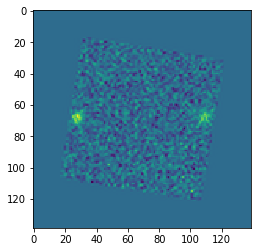

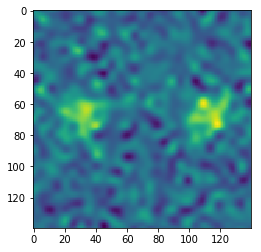

In [21]:
plt.imshow(output_1)
plt.show()
plt.imshow(output_2)
plt.show()

In [22]:
final_output = output_1+output_2
plt.imshow(final_output)

ValueError: operands could not be broadcast together with shapes (139,139) (140,140) 

In [ ]:
second_output = np.add(output_1,output_2)
plt.imshow(second_output)

In [ ]:
print(np.shape(output_1))
print(np.shape(output_2))

In [49]:
num_pairs = input("Enter the number of pairs to simulate adding together: ")
output = np.zeros(shape = (140,140))
for i in range(num_pairs):
    array = np.zeros(shape = (size_of_array,size_of_array))
    
    source_loc = np.array([np.random.randint(0,len(array)-10),np.random.randint(0,len(array)-10)])
    
    x1 = source_loc[0]
    y1 = source_loc[1]
    
    if (float(len(array)-x1)-float(x1)) == 0:
        angle = 90
    else:
        angle = np.degrees(np.arctan((float(len(array)-y1)-float(y1))/(float(len(array)-x1)-float(x1))))
    
    array[source_loc[0]][source_loc[1]] = 1
    array[-source_loc[0]][-source_loc[1]] = 1
    
    gauss_array = sp.ndimage.gaussian_filter(array,2) + np.random.normal(scale=2,size=np.shape(array))
    
    rot_array =  sp.ndimage.rotate(gauss_array, 90-angle, reshape=True)
    
    sep = np.sqrt(((len(array)-x1)-x1)**2 + ((len(array_1)-y1) - y1)**2)
    if sep <2:
        continue
    scale_fac = 80.0/sep
    
    rescaled_array = sp.ndimage.zoom(rot_array,scale_fac)
    
    centre = [len(rescaled_array)/2,len(rescaled_array)/2]
    
    final_array = galaxy_pairs.get_subarray(rescaled_array,centre,70,max_size=140)
    
    if np.shape(final_array) != np.shape(output):
        continue
    
    output = np.add(output,final_array)
    
    print("Added Pair " + str(i))

Enter the number of pairs to simulate adding together:  100000


Added Pair 0
Added Pair 1
Added Pair 2
Added Pair 4
Added Pair 5
Added Pair 6
Added Pair 7
Added Pair 8
Added Pair 9
Added Pair 10
Added Pair 11
Added Pair 12
Added Pair 14
Added Pair 15
Added Pair 16
Added Pair 17
Added Pair 18
Added Pair 19
Added Pair 20
Added Pair 21
Added Pair 22
Added Pair 23
Added Pair 24
Added Pair 25
Added Pair 26
Added Pair 28
Added Pair 29
Added Pair 30
Added Pair 31
Added Pair 33
Added Pair 34
Added Pair 35
Added Pair 36
Added Pair 37
Added Pair 38
Added Pair 39
Added Pair 40
Added Pair 43
Added Pair 45
Added Pair 46
Added Pair 47
Added Pair 48
Added Pair 49
Added Pair 51
Added Pair 52
Added Pair 53
Added Pair 54
Added Pair 55
Added Pair 56
Added Pair 58
Added Pair 59
Added Pair 62
Added Pair 63
Added Pair 64
Added Pair 65
Added Pair 66
Added Pair 67
Added Pair 68
Added Pair 69
Added Pair 73
Added Pair 74
Added Pair 76
Added Pair 77
Added Pair 78
Added Pair 79
Added Pair 81
Added Pair 82
Added Pair 85
Added Pair 87
Added Pair 88
Added Pair 89
Added Pair 91
A

Text(0.5,1,'100000 Simulated Pairs, Noisy')

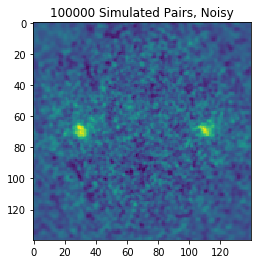

In [50]:
plt.imshow(output)
plt.title(str(num_pairs)+ " Simulated Pairs, Noisy")

In [ ]:
# help(plt.savefig)
plt.savefig(str(num_pairs)+ "_simulated_pairs_noisy.png")